In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from pandas.plotting import scatter_matrix
from matplotlib import cm
df= pd.read_csv('churn.txt', sep="\t", header=None)

In [3]:
df.head()

0       1    2   3       4    5   6   7           8            9   \
0  zero   31953    0   6  313378  161   0   4       unsat       little   
1   one   36147    0  13  800586  244   0   6       unsat       little   
2   one   27273  230   0  305049  201  16  15       unsat  very_little   
3  zero  120070   38  33  788235  780   3   2       unsat    very_high   
4   one   29215  208  85  224784  241  21   1  very_unsat       little   

              10     11  
0             no   STAY  
1    considering   STAY  
2        perhaps   STAY  
3    considering  LEAVE  
4  never_thought   STAY

In [4]:
df.shape

(20000, 12)

In [ ]:
df.describe()

In [5]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [6]:
df.columns = ['College','Income','Overage',
              'Leftover','House','HandsetPrice',
              'Over15Min','AvgCallDur','ReportedSat','ReportedUsage','ChangePlan','LeaveStay']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
College          20000 non-null object
Income           20000 non-null int64
Overage          20000 non-null int64
Leftover         20000 non-null int64
House            20000 non-null int64
HandsetPrice     20000 non-null int64
Over15Min        20000 non-null int64
AvgCallDur       20000 non-null int64
ReportedSat      20000 non-null object
ReportedUsage    20000 non-null object
ChangePlan       20000 non-null object
LeaveStay        20000 non-null object
dtypes: int64(7), object(5)
memory usage: 1.8+ MB


In [8]:
df.head(10)

College  Income  Overage  Leftover   House  HandsetPrice  Over15Min  \
0    zero   31953        0         6  313378           161          0   
1     one   36147        0        13  800586           244          0   
2     one   27273      230         0  305049           201         16   
3    zero  120070       38        33  788235           780          3   
4     one   29215      208        85  224784           241         21   
5    zero  133728       64        48  632969           626          3   
6    zero   42052      224         0  697949           191         10   
7     one   84744        0        20  688098           357          0   
8    zero   38171        0         7  274218           190          0   
9    zero  105824      174        18  153560           687         25   

   AvgCallDur ReportedSat ReportedUsage                ChangePlan LeaveStay  
0           4       unsat        little                        no      STAY  
1           6       unsat        little               considering      STAY  
2          15       unsat   very_little                   perhaps      STAY  
3           2       unsat     very_high               considering     LEAVE  
4           1  very_unsat        little             never_thought      STAY  
5           2       unsat          high                        no      STAY  
6           5  very_unsat        little  actively_looking_into_it      STAY  
7           5  very_unsat        little               considering      STAY  
8           5    very_sat        little  actively_looking_into_it      STAY  
9           4    very_sat        little             never_thought     LEAVE

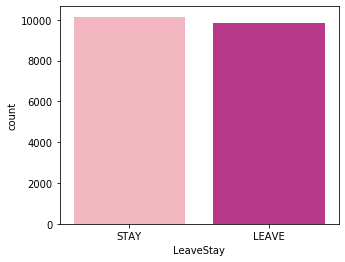

In [9]:
fig = plt.figure(figsize=(5, 4),facecolor='white')
sns.countplot(x='LeaveStay', data=df, palette='RdPu', order = df['LeaveStay'].value_counts().index)

In [10]:
print(df.groupby('ChangePlan').size())

ChangePlan
actively_looking_into_it    4994
considering                 7920
never_thought               1995
no                          4038
perhaps                     1053
dtype: int64


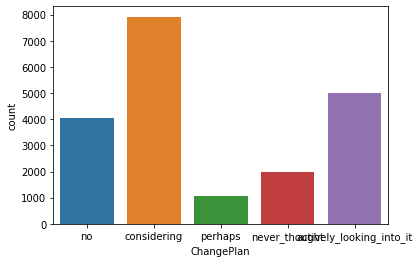

In [11]:
sns.countplot(df['ChangePlan'],label='Count')

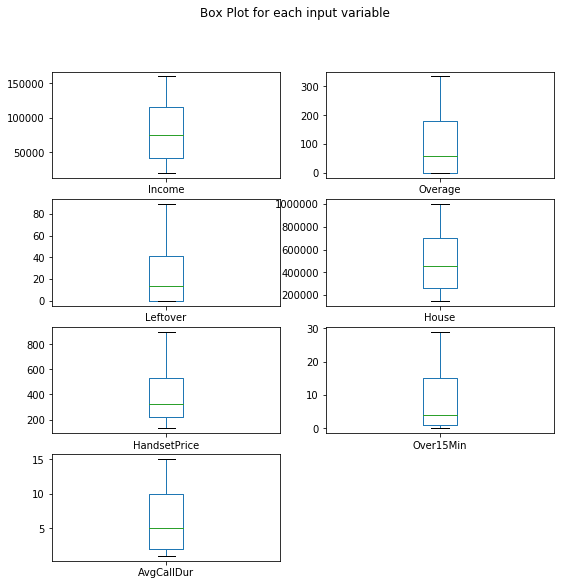

In [12]:
df.drop('LeaveStay', axis=1).plot(kind='box', subplots=True, layout=(4,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('LeaveStay')
plt.show()

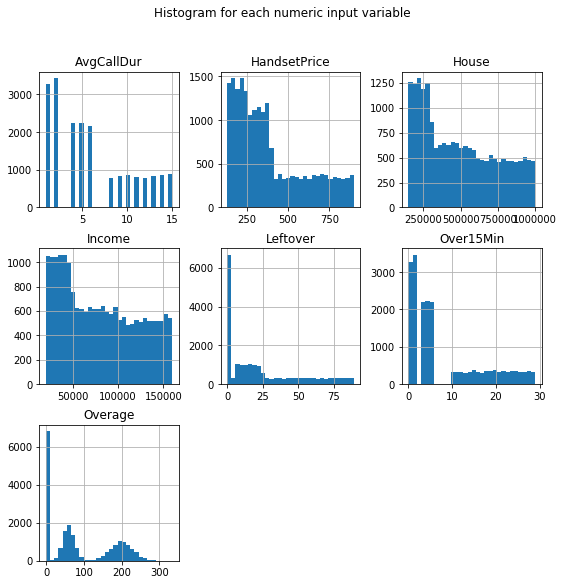

In [13]:
df.drop('LeaveStay' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('LeaveStay')
plt.show()

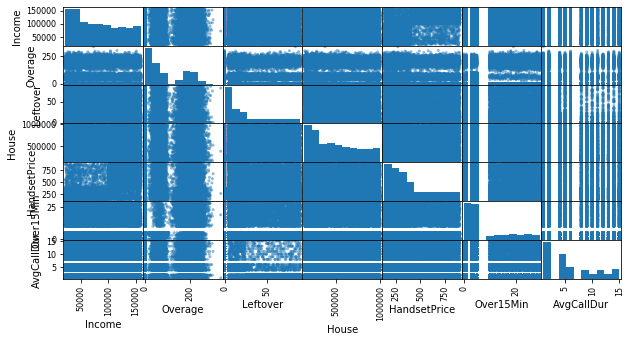

In [14]:
scatter_matrix(df.drop('LeaveStay', axis=1), figsize=(10, 5))
plt.show()

In [15]:
leaveStay = {'LEAVE': 0,'STAY': 1}
df.LeaveStay = [leaveStay[item] for item in df.LeaveStay] 

In [16]:
df.head(5)

College  Income  Overage  Leftover   House  HandsetPrice  Over15Min  \
0    zero   31953        0         6  313378           161          0   
1     one   36147        0        13  800586           244          0   
2     one   27273      230         0  305049           201         16   
3    zero  120070       38        33  788235           780          3   
4     one   29215      208        85  224784           241         21   

   AvgCallDur ReportedSat ReportedUsage     ChangePlan  LeaveStay  
0           4       unsat        little             no          1  
1           6       unsat        little    considering          1  
2          15       unsat   very_little        perhaps          1  
3           2       unsat     very_high    considering          0  
4           1  very_unsat        little  never_thought          1

In [50]:
feature_names = ['Income','Overage','Leftover','House','HandsetPrice','Over15Min','AvgCallDur']
X = df[feature_names]
y = df['LeaveStay']

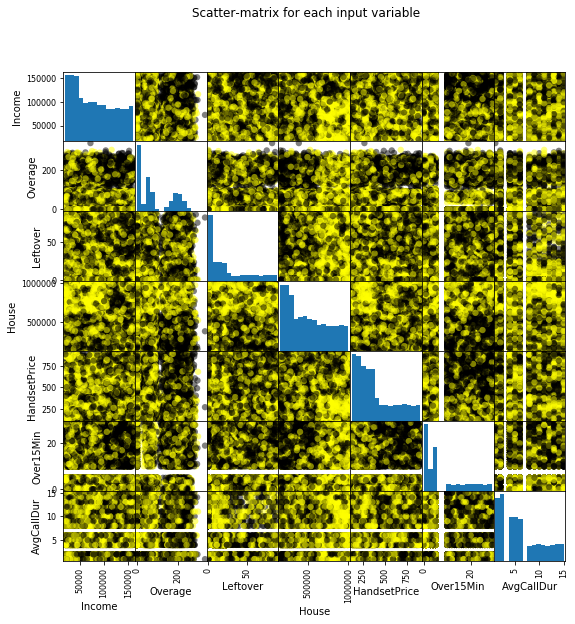

In [51]:
from pandas.plotting import scatter_matrix
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('scatter_matrix')

## Creating training and data set  with random state

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Apply scalling 

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build Models

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.64
Accuracy of Logistic regression classifier on test set: 0.65


C:\Users\16303\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.61


### Decision Tree with max set 

In [23]:
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.69
Accuracy of Decision Tree classifier on test set: 0.69


### K-Nearest Neighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.65


### Linear Discriminant

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.64
Accuracy of LDA classifier on test set: 0.65


### Gaussian  Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.63
Accuracy of GNB classifier on test set: 0.65


### Support Vector Machine 

In [27]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

C:\Users\16303\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 0.67
Accuracy of SVM classifier on test set: 0.67


In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf2.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1467  957]
 [ 576 2000]]
              precision    recall  f1-score   support

           0       0.72      0.61      0.66      2424
           1       0.68      0.78      0.72      2576

    accuracy                           0.69      5000
   macro avg       0.70      0.69      0.69      5000
weighted avg       0.70      0.69      0.69      5000



### Graph for Decision Tree

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.241187 to fit



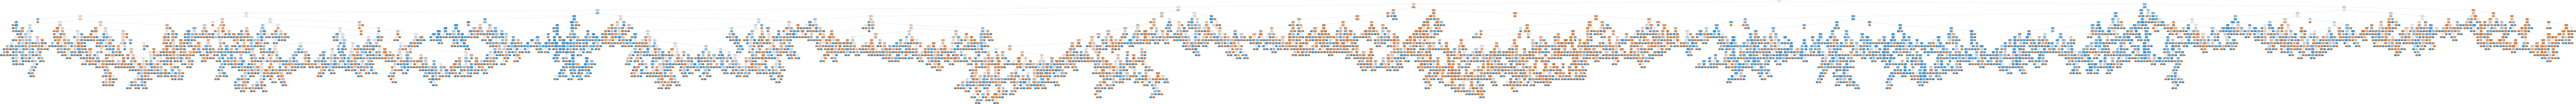

In [29]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### decision tree with max depth

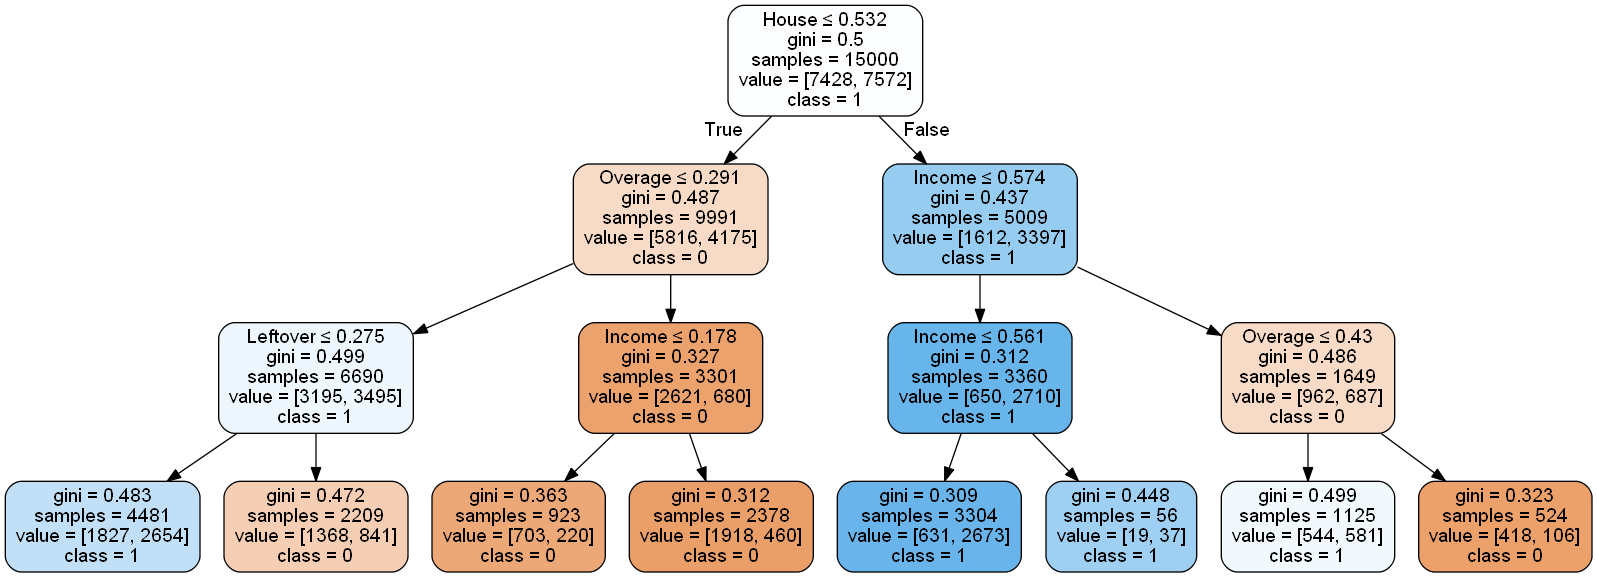

In [34]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(linreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(linreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.11
Accuracy of Logistic regression classifier on test set: 0.12


In [71]:
linreg.intercept_

0.6295069164344035

In [72]:
linreg.coef_

array([-0.0991519 , -0.3750751 , -0.1728937 ,  0.3515579 , -0.07727291,
       -0.08258543, -0.08913154])

In [73]:
y_pred = linreg.predict(X_test)

In [74]:
df_lg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_lg

Actual  Predicted
19134       1   0.579881
4981        0   0.318471
16643       0   0.553329
19117       0   0.416762
5306        1   0.600670
230         1   0.421951
3148        0   0.509321
11525       0   0.615970
13672       0   0.147094
1624        0   0.342032
13415       1   0.434073
18827       1   0.470433
18550       0   0.525503
5228        0   0.621672
4623        0   0.576997
3719        1   0.591681
11640       0   0.272567
2461        1   0.685685
2051        1   0.116367
15410       0   0.642908
13290       1   0.181268
6518        1   0.369901
768         0   0.288649
19197       0   0.233524
16663       0   0.635281
17114       0   0.608280
4144        1   0.241037
18896       1   0.773290
16559       1   0.595396
7025        1   0.712237
...       ...        ...
9763        1   0.398041
10005       0   0.299205
13395       1   0.609296
8712        0   0.552157
6190        1   0.482567
13230       0   0.337527
1466        0   0.843049
15052       0   0.503568
19789       1   0.620564
19913       1   0.510374
994         1   0.388402
9503        1   0.860445
4597        1   0.542296
10464       0   0.449808
16718       0   0.272982
3485        1   0.707975
9241        0   0.338422
528         0   0.617300
9091        0   0.211171
12453       0   0.371308
11850       0   0.231848
17600       1   0.534675
10186       0   0.610336
5154        1   0.408581
17395       1   0.584745
10235       0   0.550052
1914        1   0.596451
13584       0   0.270751
5594        1   0.356932
16222       1   0.387657

[5000 rows x 2 columns]

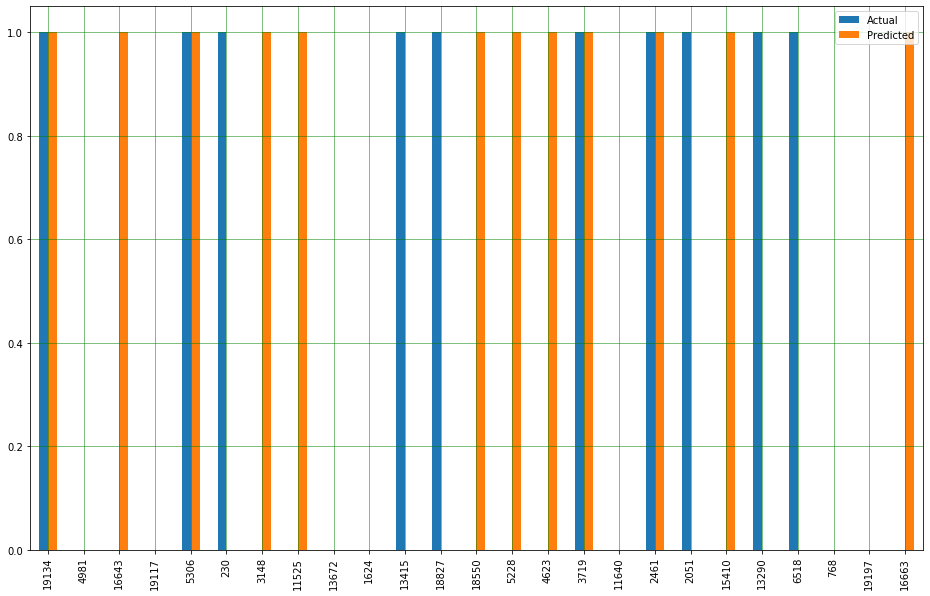

In [63]:
df1_lg = df_lg.head(25)
df1_lg.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn.model_selection import KFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]